# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
import chart_studio as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px
%matplotlib inline

In [2]:
world = pd.read_csv('worldometer_data.csv')

In [3]:
full = pd.read_csv('full_grouped.csv') # used in Prophet model

In [8]:
covid = pd.read_csv('country_wise_latest.csv')

In [9]:
day = pd.read_csv('day_wise.csv')

In [10]:
covid.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [11]:
day.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020-01-22        555      17         28     510          0           0   
1  2020-01-23        654      18         30     606         99           1   
2  2020-01-24        941      26         36     879        287           8   
3  2020-01-25       1434      42         39    1353        493          16   
4  2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [12]:
world.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [13]:
full.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

In [14]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [15]:
covid.describe()

Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635            3.454302              26.287694   
min       0.000000       0.000000            0.000000               0.000000   
25%       0.000000       0.000000            0.945000              48.770000   
50%       1.000000      22.000000            2.150000              71.320000   
75%       6.000000     221.000000            3.875000              86.885000   
max    1076.000000   33728.000000           28.560000             100.000000   

       Deaths / 100 Recovered  Confirmed last week  1 week change  \
count                  187.00         1.870000e+02     187.000000   
mean                      inf         7.868248e+04    9448.459893   
std                       NaN         3.382737e+05   47491.127684   
min                      0.00         1.000000e+01     -47.000000   
25%                      1.45         1.051500e+03      49.000000   
50%                      3.62         5.020000e+03     432.000000   
75%                      6.44         3.708050e+04    3172.000000   
max                       inf         3.834677e+06  455582.000000   

       1 week % increase  
count         187.000000  
mean           13.606203  
std            24.509838  
min            -3.840000  
25%             2.775000  
50%             6.890000  
75%            16.855000  
max           226.320000

The describe() method presents some quick statistics to the data. 

In [16]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


Using the info() method, we can the data type, and the amount of non-null items in the data frame.

In [17]:
day.describe()

Confirmed         Deaths     Recovered        Active      New cases  \
count  1.880000e+02     188.000000  1.880000e+02  1.880000e+02     188.000000   
mean   4.406960e+06  230770.760638  2.066001e+06  2.110188e+06   87771.021277   
std    4.757988e+06  217929.094183  2.627976e+06  1.969670e+06   75295.293255   
min    5.550000e+02      17.000000  2.800000e+01  5.100000e+02       0.000000   
25%    1.121910e+05    3935.000000  6.044125e+04  5.864175e+04    5568.500000   
50%    2.848733e+06  204190.000000  7.847840e+05  1.859759e+06   81114.000000   
75%    7.422046e+06  418634.500000  3.416396e+06  3.587015e+06  131502.500000   
max    1.648048e+07  654036.000000  9.468087e+06  6.358362e+06  282756.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   188.000000     188.000000          188.000000             188.000000   
mean   3478.824468   50362.015957            4.860638              34.343936   
std    2537.735652   56090.892479            1.579541              16.206159   
min       0.000000       0.000000            2.040000               1.710000   
25%     250.750000    2488.250000            3.510000              22.785000   
50%    4116.000000   30991.500000            4.850000              35.680000   
75%    5346.000000   79706.250000            6.297500              48.945000   
max    9966.000000  284394.000000            7.180000              57.450000   

       Deaths / 100 Recovered  No. of countries  
count              188.000000        188.000000  
mean                22.104521        144.351064  
std                 22.568307         65.175979  
min                  6.260000          6.000000  
25%                  9.650000        101.250000  
50%                 15.380000        184.000000  
75%                 25.342500        187.000000  
max                134.430000        187.000000

In [18]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [19]:
world.describe()

Population    TotalCases     NewCases    TotalDeaths   NewDeaths  \
count  2.080000e+02  2.090000e+02     4.000000     188.000000    3.000000   
mean   3.041549e+07  9.171850e+04  1980.500000    3792.590426  300.000000   
std    1.047661e+08  4.325867e+05  3129.611424   15487.184877  451.199512   
min    8.010000e+02  1.000000e+01    20.000000       1.000000    1.000000   
25%    9.663140e+05  7.120000e+02    27.500000      22.000000   40.500000   
50%    7.041972e+06  4.491000e+03   656.000000     113.000000   80.000000   
75%    2.575614e+07  3.689600e+04  2609.000000     786.000000  449.500000   
max    1.381345e+09  5.032179e+06  6590.000000  162804.000000  819.000000   

       TotalRecovered  NewRecovered   ActiveCases  Serious,Critical  \
count    2.050000e+02      3.000000  2.050000e+02        122.000000   
mean     5.887898e+04   1706.000000  2.766433e+04        534.393443   
std      2.566984e+05   2154.779803  1.746327e+05       2047.518613   
min      7.000000e+00     42.000000  0.000000e+00          1.000000   
25%      3.340000e+02    489.000000  8.600000e+01          3.250000   
50%      2.178000e+03    936.000000  8.990000e+02         27.500000   
75%      2.055300e+04   2538.000000  7.124000e+03        160.250000   
max      2.576668e+06   4140.000000  2.292707e+06      18296.000000   

       Tot Cases/1M pop  Deaths/1M pop    TotalTests   Tests/1M pop  
count        208.000000     187.000000  1.910000e+02     191.000000  
mean        3196.024038      98.681176  1.402405e+06   83959.366492  
std         5191.986457     174.956862  5.553367e+06  152730.591240  
min            3.000000       0.080000  6.100000e+01       4.000000  
25%          282.000000       6.000000  2.575200e+04    8956.500000  
50%         1015.000000      29.000000  1.357020e+05   32585.000000  
75%         3841.750000      98.000000  7.576960e+05   92154.500000  
max        39922.000000    1238.000000  6.313960e+07  995282.000000

In [20]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [21]:
full.describe()

Confirmed         Deaths     Recovered        Active    New cases  \
count  3.515600e+04   35156.000000  3.515600e+04  3.515600e+04  35156.00000   
mean   2.356663e+04    1234.068239  1.104813e+04  1.128443e+04    469.36375   
std    1.499818e+05    7437.238354  6.454640e+04  8.997149e+04   3005.86754   
min    0.000000e+00       0.000000  0.000000e+00 -2.000000e+00      0.00000   
25%    1.000000e+00       0.000000  0.000000e+00  0.000000e+00      0.00000   
50%    2.500000e+02       4.000000  3.300000e+01  8.500000e+01      2.00000   
75%    3.640250e+03      78.250000  1.286250e+03  1.454000e+03     75.00000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  77255.00000   

         New deaths  New recovered  
count  35156.000000   35156.000000  
mean      18.603339     269.315593  
std      115.706351    2068.063852  
min    -1918.000000  -16298.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        1.000000      20.000000  
max     3887.000000  140050.000000

# Exploratory Data Analysis

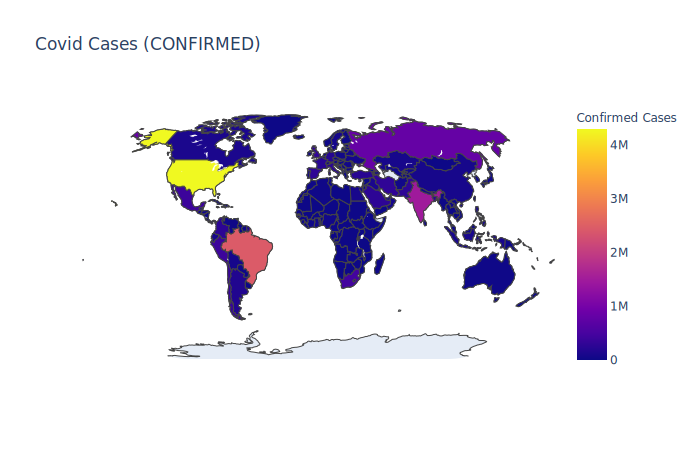

In [100]:
data = dict(type='choropleth',
            locations = covid['Country/Region'],
            locationmode = 'country names',
            z = covid['Confirmed'],
            text = covid['Country/Region'],
            colorbar = {'title':'Confirmed Cases'}
            ) 

layout = dict(title='Covid Cases (CONFIRMED)',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap1=go.Figure(data=[data],layout=layout)
choromap1.show("svg")

Most of the concentration of Covid-19 confirmed cases are in the U.S. and Brazil. These countries have the most confirmed cases. We can visualize this data using a choropleth map created with Plotly libraries.

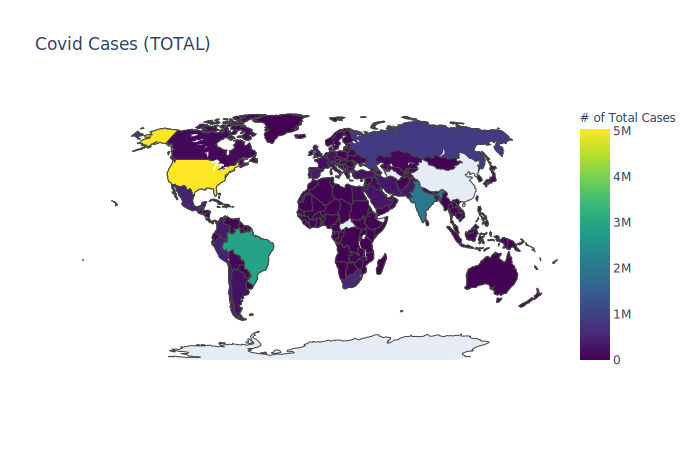

In [101]:
data = dict(type='choropleth',
            locations = world['Country/Region'],
            locationmode = 'country names',
            z = world['TotalCases'],
            text = world['Country/Region'],
            colorbar = {'title':'# of Total Cases'},
            colorscale = 'viridis'
            ) 

layout = dict(title='Covid Cases (TOTAL)',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap2=go.Figure(data=[data],layout=layout)
choromap2.show("svg")



Just like the previous map, U.S. and Brazil have the most total cases. India and Russia also have a significant amount of total cases. Information about China is not present in this data set and on the map.

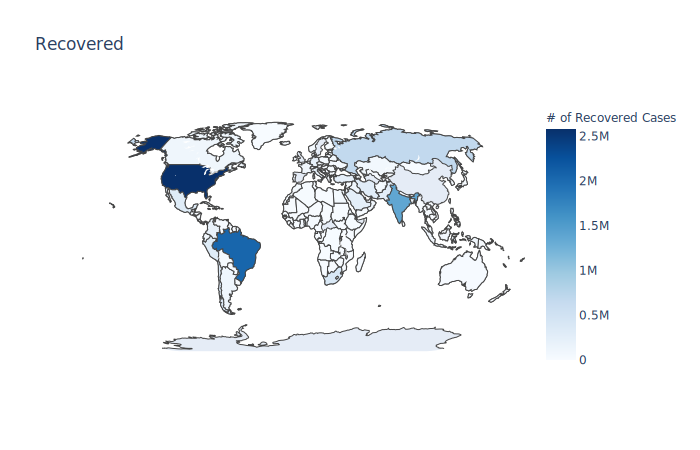

In [102]:
data = dict(type='choropleth',
            locations = world['Country/Region'],
            locationmode = 'country names',
            z = world['TotalRecovered'],
            text = world['Country/Region'],
            colorbar = {'title':'# of Recovered Cases'},
            colorscale = 'blues'
            ) 

layout = dict(title='Recovered',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap3=go.Figure(data=[data],layout=layout)
choromap3.show("svg")

Though U.S. has the most cases, they also have the most recovered. This may be because they had many cases to start off with. 

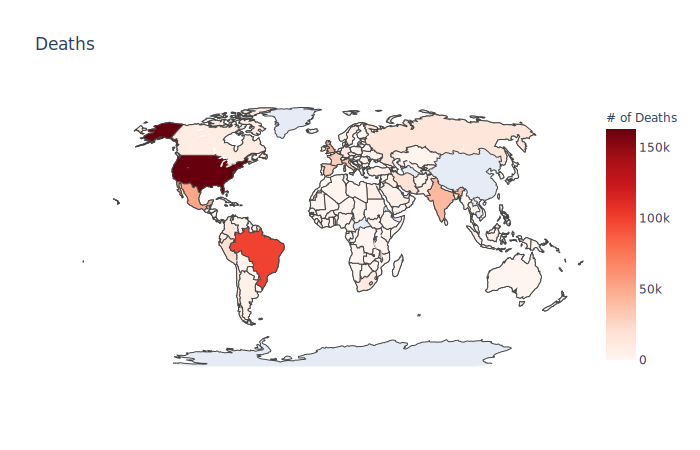

In [103]:
data = dict(type='choropleth',
            locations = world['Country/Region'],
            locationmode = 'country names',
            z = world['TotalDeaths'],
            text = world['Country/Region'],
            colorbar = {'title':'# of Deaths'},
            colorscale = 'reds'
            ) 

layout = dict(title='Deaths',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap4=go.Figure(data=[data],layout=layout)
choromap4.show("svg")

Just like the previous geographical maps, U.S. and Brazil also have the most deaths.

In [26]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Recovered', ylabel='Density'>

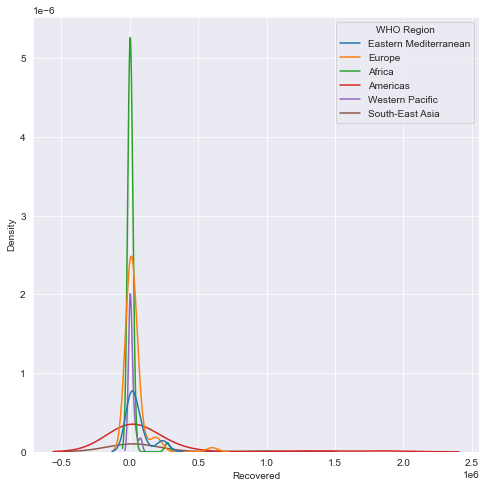

In [27]:
plt.figure(figsize=(8,8))
sns.kdeplot(x = 'Recovered',data=covid, hue="WHO Region")

This graph shows the distribution of recovered cases for each WHO region plotted on top of each other.

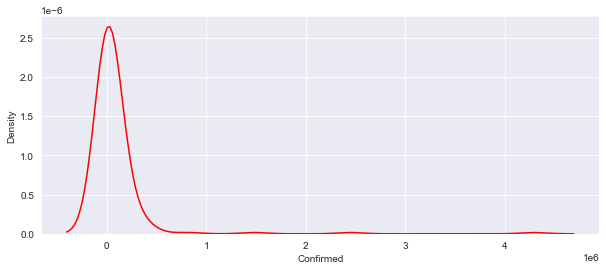

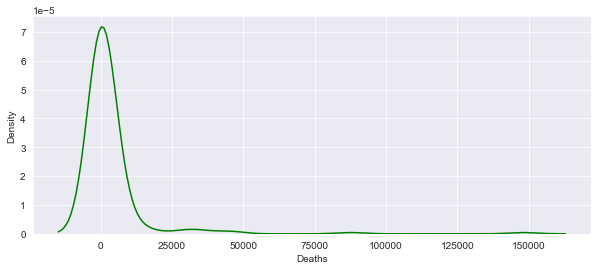

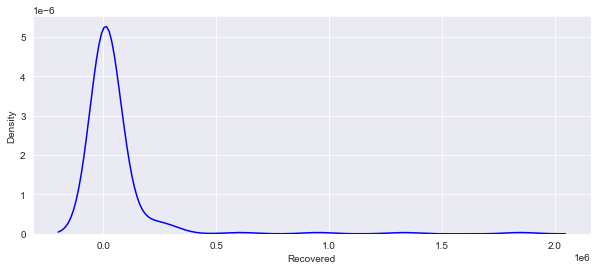

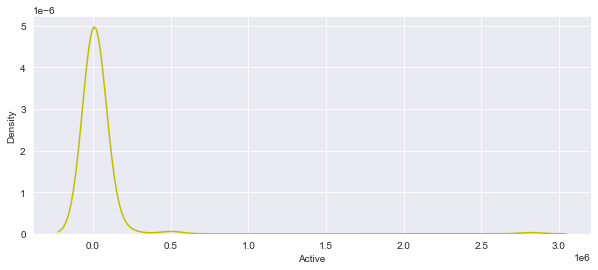

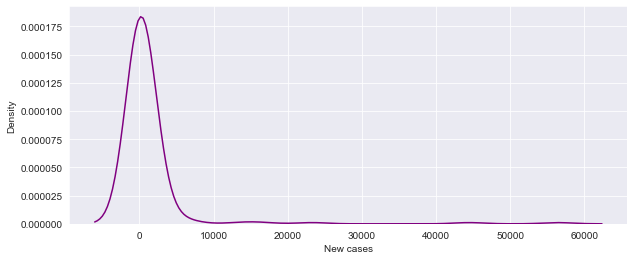

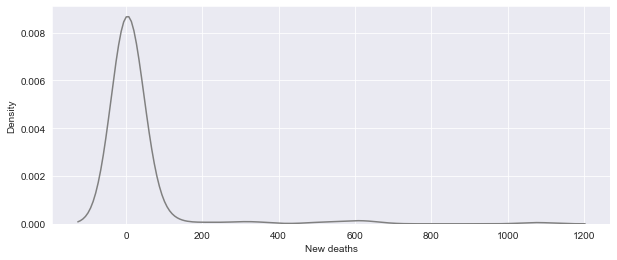

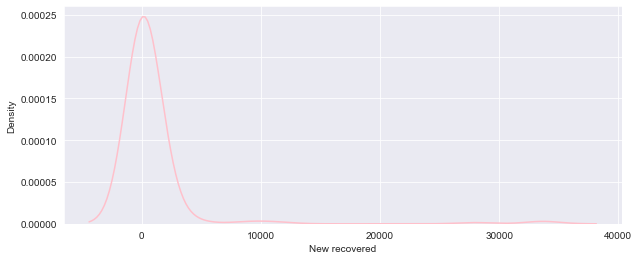

In [28]:
# Confirmed
plt.figure(figsize=(10,4))
ax1 = sns.kdeplot(data=covid, x="Confirmed",color='r')
plt.show(ax1)

# Deaths
plt.figure(figsize=(10,4))
ax2 = sns.kdeplot(data=covid, x="Deaths", color='g')
plt.show(ax2)

# Recovered
plt.figure(figsize=(10,4))
ax3 = sns.kdeplot(data=covid, x="Recovered", color='b')
plt.show(ax3)

# Active
plt.figure(figsize=(10,4))
ax4 = sns.kdeplot(data=covid, x="Active", color='y')
plt.show(ax4)

# New Cases
plt.figure(figsize=(10,4))
ax5 = sns.kdeplot(data=covid, x="New cases", color='purple')
plt.show(ax5)

# New Deaths
plt.figure(figsize=(10,4))
ax6 = sns.kdeplot(data=covid, x="New deaths", color='gray')
plt.show(ax6)

# New Recovered
plt.figure(figsize=(10,4))
ax7 = sns.kdeplot(data=covid, x="New recovered", color='pink')
plt.show(ax7)

These kde plots represent the distribution of several of the numerical features (recovered, confirmed, deaths...)

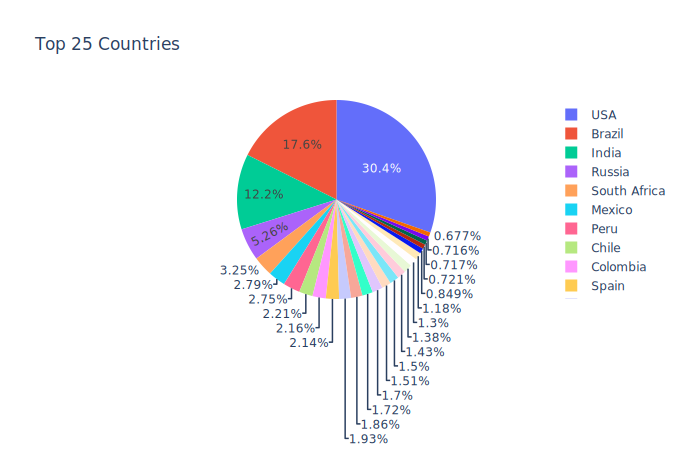

In [104]:
pie1 = px.pie(world[:25], values='TotalCases', names='Country/Region', 
       title='Top 25 Countries')
pie1.show("svg")

The percentage of the top 25 countries with the most cases is represented in this pie chart. U.S. has almost 1/3 of the total cases among these 25 countries. This pie chart was created using Plotly libraries.

In [30]:
europe = world[world['Continent'] == 'Europe']
asia = world[world['Continent'] == 'Asia']
north_america = world[world['Continent'] == 'North America']
south_america = world[world['Continent'] == 'South America']
australia_oceania = world[world['Continent'] == 'Australia/Oceania']

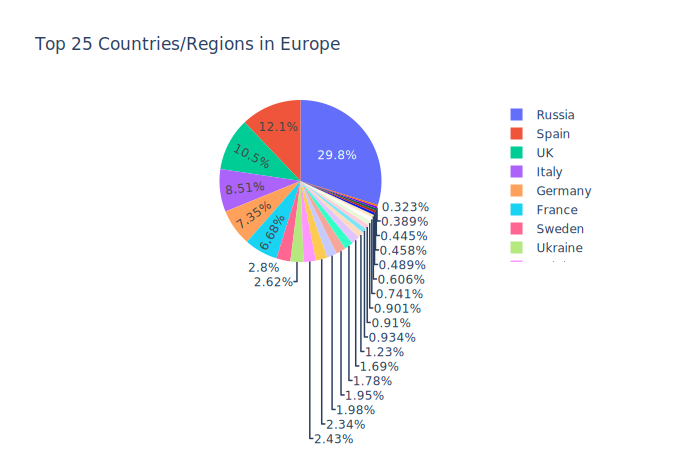

In [105]:
pie2 = px.pie(europe[:25], values='TotalCases', names='Country/Region', 
       title='Top 25 Countries/Regions in Europe')
pie2.show("svg")

Russia has over a quarter of the total cases in Europe. 

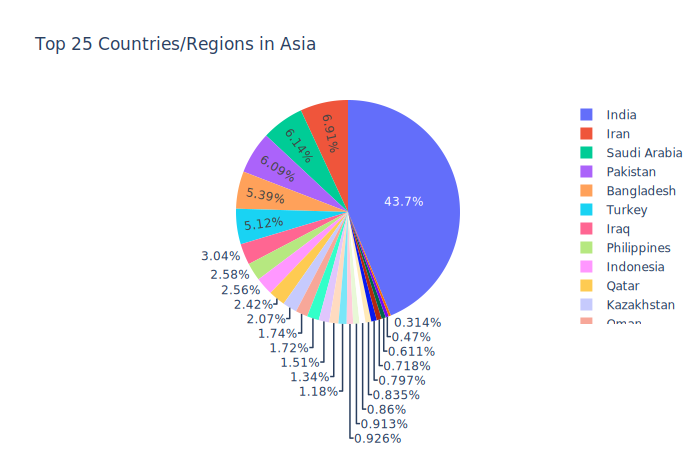

In [106]:
pie3 = px.pie(asia[:25], values='TotalCases', names='Country/Region', 
       title='Top 25 Countries/Regions in Asia')
pie3.show("svg")

India has the most cases in Asia. This is consisent with the previous geographical maps.

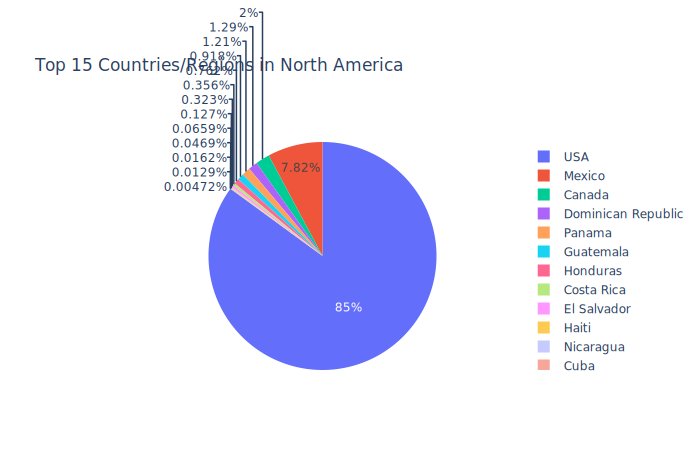

In [107]:
pie4 = px.pie(north_america[:15], values='TotalCases', names='Country/Region', 
       title='Top 15 Countries/Regions in North America')
pie4.show("svg")

U.S. has 85% of the total cases in North America.

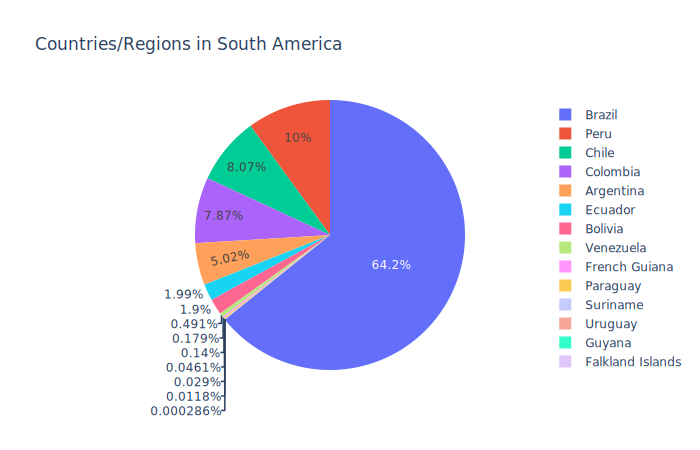

In [108]:
pie5 = px.pie(south_america, values='TotalCases', names='Country/Region', 
       title='Countries/Regions in South America')
pie5.show("svg")

Brazil has the majority of the total cases in South America.

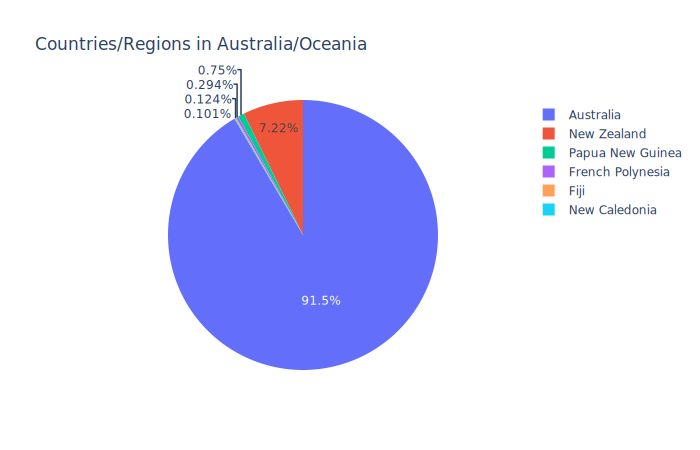

In [109]:
pie6 = px.pie(australia_oceania, values='TotalCases', names='Country/Region', 
       title='Countries/Regions in Australia/Oceania')
pie6.show("svg")

Australia has the most cases. This makes sense as Australia is the largest country/continent in this area.

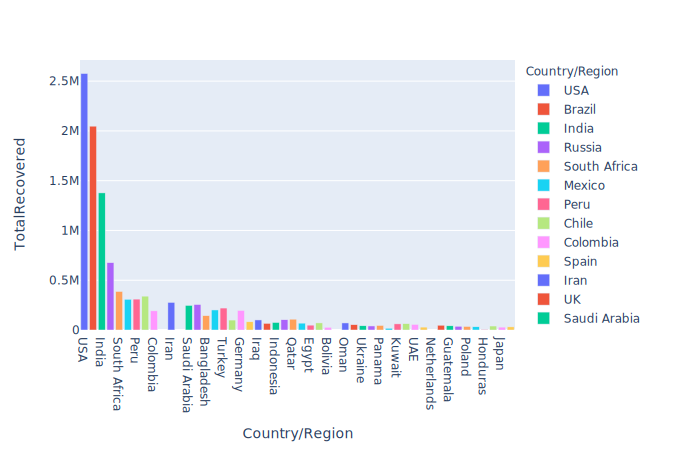

In [110]:
fig1 = px.bar(world[:50], x = 'Country/Region', y = 'TotalRecovered',color = 'Country/Region')
fig1.show("svg")

This is another representation of the total cases through an interactive bar plot.

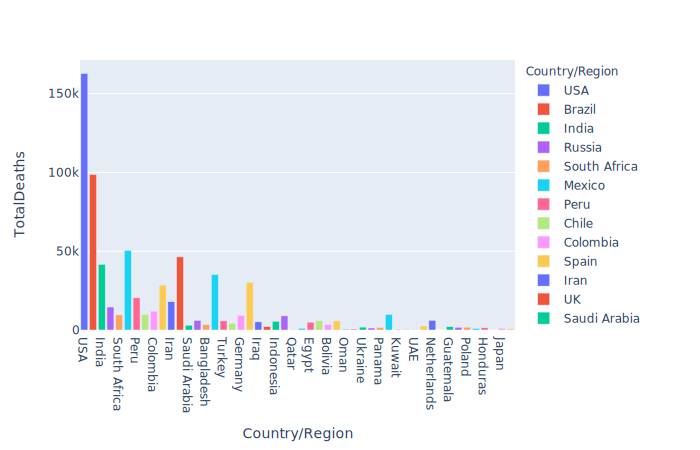

In [111]:
fig2 = px.bar(world[:50], x = 'Country/Region', y = 'TotalDeaths',color = 'Country/Region')
fig2.show("svg")

The following plots show the amount of confirmed, recovered, and death cases in the WHO Region. Each bar is also divided into larger and smaller sections based on which country has the most cases.

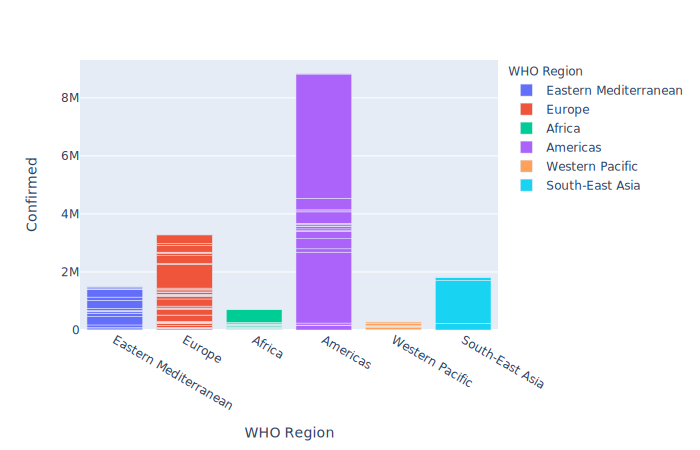

In [112]:
fig3 = px.bar(covid, x = 'WHO Region', y = 'Confirmed',color = 'WHO Region')
fig3.show("svg")

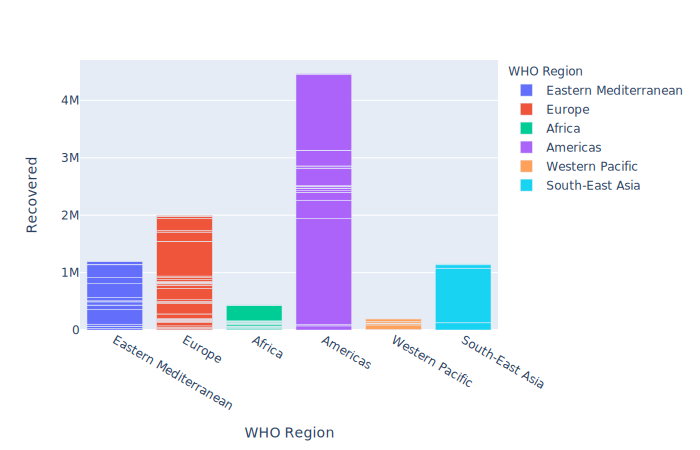

In [113]:
fig4 = px.bar(covid, x = 'WHO Region', y = 'Recovered',color = 'WHO Region')
fig4.show("svg")

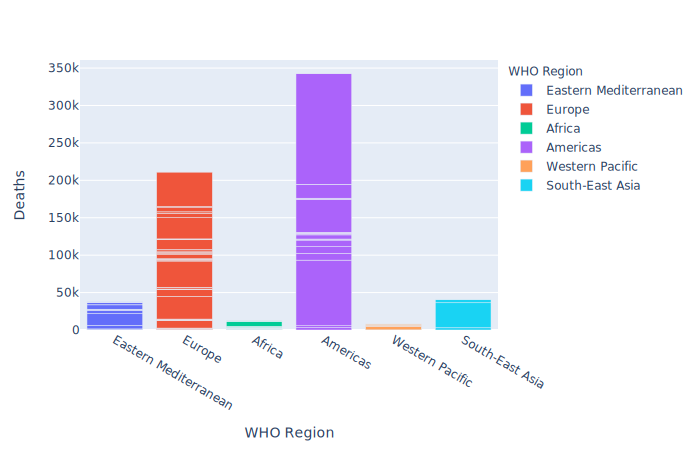

In [114]:
fig5 = px.bar(covid, x = 'WHO Region', y = 'Deaths',color = 'WHO Region')
fig5.show("svg")

<AxesSubplot:>

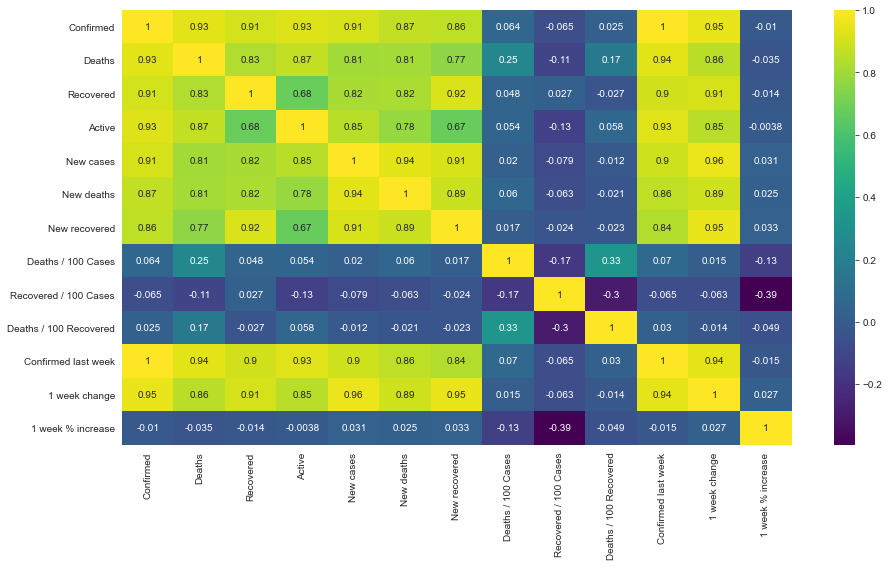

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(covid.corr(),cmap='viridis',annot=True)

With this heatmap, we can see what features are most correlated with the number of confirmed cases. 
Most correlated features:
- Deaths (93%)
- Active (93%)
- Recovered (91%)
- New cases (91%)
- New deaths (87%)
- New recovered (86%)
- Confirmed last week (100%)
- 1 week change (95%)

<AxesSubplot:>

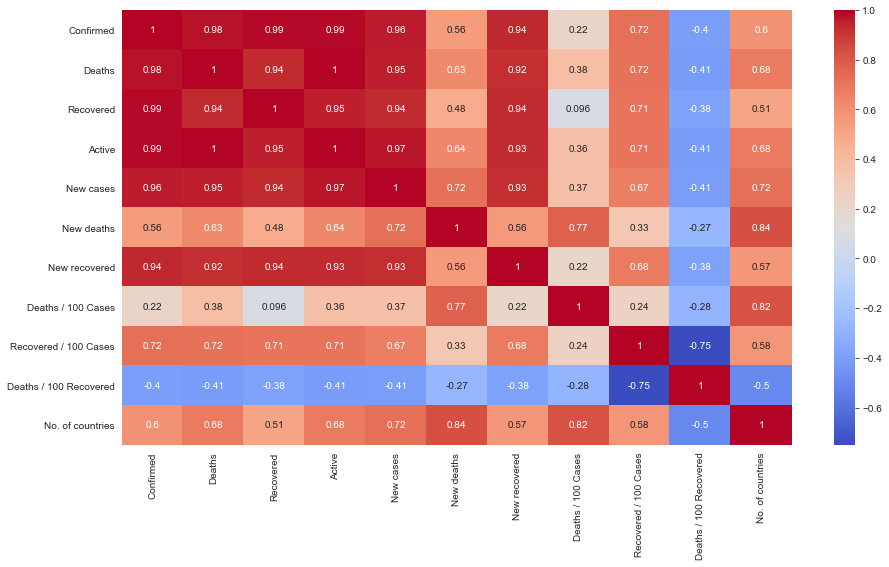

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(day.corr(),cmap='coolwarm',annot=True)

Most correlated with confirmed:
- Recovered (99%)
- Active (99%)
- Deaths (98%)
- New cases (96%)
- New recovered (94%)
- Recoverd/100 Cases (72%)
- No. of Countries (60%)
- New deaths (56%)

<AxesSubplot:>

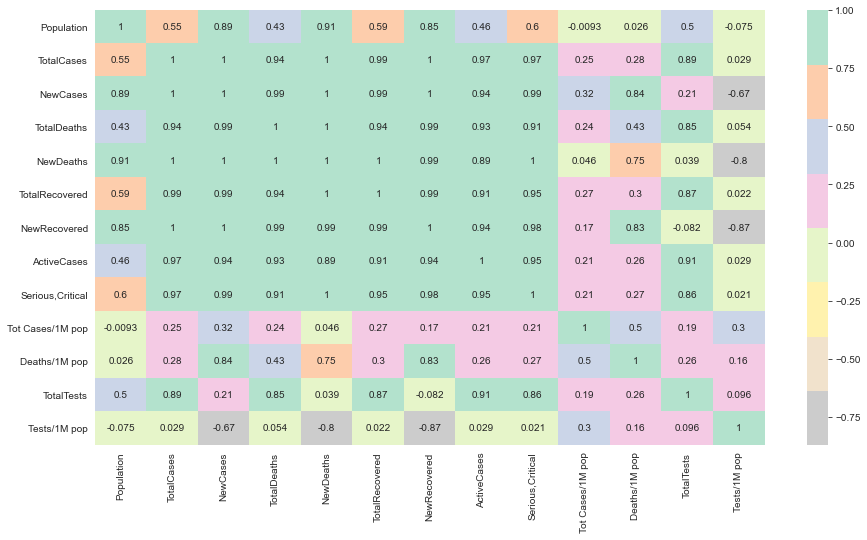

In [43]:
plt.figure(figsize=(15,8))
sns.heatmap(world.corr(),cmap='Pastel2_r',annot=True)

Most correlated with total cases:
- NewCases (100%)
- NewDeaths (100%)
- NewRecovered (100%)
- ActiveCases (97%)
- SeriousCritical (97%)
- TotalDeaths (94%)
- TotalTests (89%)
- Population (55%)

# Data PreProcessing

In [44]:
day.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020-01-22        555      17         28     510          0           0   
1  2020-01-23        654      18         30     606         99           1   
2  2020-01-24        941      26         36     879        287           8   
3  2020-01-25       1434      42         39    1353        493          16   
4  2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [45]:
covid.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [46]:
covid.isnull().sum() # no null values

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [47]:
day.isnull().sum() # no null values

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [48]:
day['Date']=pd.to_datetime(day['Date']) # converting Data into datetime

In [49]:
day['Day'] = day['Date'].apply(lambda x: x.hour)
day['Month'] = day['Date'].apply(lambda x: x.month)
day['Year'] = day['Date'].apply(lambda x: x.dayofweek)

This creates seperate numerical columns with the year, month, and day.

In [50]:
day_temp = day.copy()
day_temp = day_temp.drop('Date',axis=1)
day_temp.head()

Confirmed  Deaths  Recovered  Active  New cases  New deaths  New recovered  \
0        555      17         28     510          0           0              0   
1        654      18         30     606         99           1              2   
2        941      26         36     879        287           8              6   
3       1434      42         39    1353        493          16              3   
4       2118      56         52    2010        684          14             13   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  \
0                3.06                   5.05                   60.71   
1                2.75                   4.59                   60.00   
2                2.76                   3.83                   72.22   
3                2.93                   2.72                  107.69   
4                2.64                   2.46                  107.69   

   No. of countries  Day  Month  Year  
0                 6    0      1     2  
1                 8    0      1     3  
2                 9    0      1     4  
3                11    0      1     5  
4                13    0      1     6

day_temp will be used in model

# Model for Confirmed Cases

## Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

X = day_temp.drop('Confirmed',axis=1).values
y = day_temp['Confirmed'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Building Neural Network Model

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
X_train.shape

(131, 13)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MinMaxScaler scales each feature to a given range. This is known as feature scaling and normalizes the range of features in the data. This allows the neural network to converge faster to the local minimum. 

To learn more about why feature scaling is important, [read this article](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35).

In [54]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

When building the model, it is important to use [dropout layers](https://keras.io/api/layers/regularization_layers/dropout/) to prevent overfitting. The activation function is [relu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/#:~:text=The%20rectified%20linear%20activation%20function,otherwise%2C%20it%20will%20output%20zero.&text=The%20rectified%20linear%20activation%20function%20overcomes%20the%20vanishing%20gradient%20problem,learn%20faster%20and%20perform%20better.) (rectified linear unit) with the optimizer being [adam](https://www.tensorflow.org/swift/api_docs/Classes/Adam). Relu is a piecewise linear function that is easy to train and is generally the default activation function. The adam optimizer helps update weights more efficiently than stochastic gradient descent (adam is an extension of this).

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[])

Epoch 1/600
5/5 [==============================] - 2s 138ms/step - loss: 34408726091093.3320 - val_loss: 45247904088064.0000
Epoch 2/600
5/5 [==============================] - 0s 10ms/step - loss: 36097837673130.6641 - val_loss: 45247895699456.0000
Epoch 3/600
5/5 [==============================] - 0s 20ms/step - loss: 43127829517653.3359 - val_loss: 45247895699456.0000
Epoch 4/600
5/5 [==============================] - 0s 18ms/step - loss: 41460633523541.3359 - val_loss: 45247895699456.0000
Epoch 5/600
5/5 [==============================] - 0s 15ms/step - loss: 38697792350890.6641 - val_loss: 45247895699456.0000
Epoch 6/600
5/5 [==============================] - 0s 13ms/step - loss: 38456166886058.6641 - val_loss: 45247891505152.0000
Epoch 7/600
5/5 [==============================] - 0s 12ms/step - loss: 40767457678677.3359 - val_loss: 45247891505152.0000
Epoch 8/600
5/5 [==============================] - 0s 10ms/step - loss: 37249575725738.6641 - val_loss: 45247887310848.0000
Epoch 9

5/5 [==============================] - 0s 10ms/step - loss: 40704446649685.3359 - val_loss: 45070661189632.0000
Epoch 67/600
5/5 [==============================] - 0s 10ms/step - loss: 38376015833770.6641 - val_loss: 45051774238720.0000
Epoch 68/600
5/5 [==============================] - 0s 10ms/step - loss: 38040442153642.6641 - val_loss: 45032631435264.0000
Epoch 69/600
5/5 [==============================] - 0s 10ms/step - loss: 42908744941568.0000 - val_loss: 45011076907008.0000
Epoch 70/600
5/5 [==============================] - 0s 10ms/step - loss: 37297700820309.3359 - val_loss: 44989094559744.0000
Epoch 71/600
5/5 [==============================] - 0s 10ms/step - loss: 40500216900266.6641 - val_loss: 44965405130752.0000
Epoch 72/600
5/5 [==============================] - 0s 10ms/step - loss: 39109880272213.3359 - val_loss: 44940482576384.0000
Epoch 73/600
5/5 [==============================] - 0s 10ms/step - loss: 36365515008682.6641 - val_loss: 44913462870016.0000
Epoch 74/600


5/5 [==============================] - 0s 10ms/step - loss: 33492042077525.3320 - val_loss: 34720140230656.0000
Epoch 132/600
5/5 [==============================] - 0s 9ms/step - loss: 29310464644437.3320 - val_loss: 34371092348928.0000
Epoch 133/600
5/5 [==============================] - 0s 9ms/step - loss: 32839503446016.0000 - val_loss: 33989251301376.0000
Epoch 134/600
5/5 [==============================] - 0s 11ms/step - loss: 30906438210901.3320 - val_loss: 33606179225600.0000
Epoch 135/600
5/5 [==============================] - 0s 10ms/step - loss: 28716550498986.6680 - val_loss: 33227915919360.0000
Epoch 136/600
5/5 [==============================] - 0s 10ms/step - loss: 28527682387968.0000 - val_loss: 32816635052032.0000
Epoch 137/600
5/5 [==============================] - 0s 10ms/step - loss: 28300784173056.0000 - val_loss: 32359244103680.0000
Epoch 138/600
5/5 [==============================] - 0s 10ms/step - loss: 27277597693269.3320 - val_loss: 31901165289472.0000
Epoch 13

5/5 [==============================] - 0s 10ms/step - loss: 15325839491072.0000 - val_loss: 13821308567552.0000
Epoch 197/600
5/5 [==============================] - 0s 10ms/step - loss: 12743653982208.0000 - val_loss: 13717485912064.0000
Epoch 198/600
5/5 [==============================] - 0s 10ms/step - loss: 13120988949162.6660 - val_loss: 13603503603712.0000
Epoch 199/600
5/5 [==============================] - 0s 9ms/step - loss: 14514442294613.3340 - val_loss: 13486958575616.0000
Epoch 200/600
5/5 [==============================] - 0s 9ms/step - loss: 17467748909056.0000 - val_loss: 13399379410944.0000
Epoch 201/600
5/5 [==============================] - 0s 10ms/step - loss: 17399614712490.6660 - val_loss: 13382913622016.0000
Epoch 202/600
5/5 [==============================] - 0s 10ms/step - loss: 12302276012714.6660 - val_loss: 13330033934336.0000
Epoch 203/600
5/5 [==============================] - 0s 9ms/step - loss: 12157028488533.3340 - val_loss: 13290232086528.0000
Epoch 204

5/5 [==============================] - 0s 9ms/step - loss: 16025302422869.3340 - val_loss: 10876333588480.0000
Epoch 262/600
5/5 [==============================] - 0s 10ms/step - loss: 15788428580181.3340 - val_loss: 10853230313472.0000
Epoch 263/600
5/5 [==============================] - 0s 10ms/step - loss: 14739800500906.6660 - val_loss: 10888771796992.0000
Epoch 264/600
5/5 [==============================] - 0s 10ms/step - loss: 15328614722218.6660 - val_loss: 10926883340288.0000
Epoch 265/600
5/5 [==============================] - 0s 10ms/step - loss: 11818828387669.3340 - val_loss: 10911930646528.0000
Epoch 266/600
5/5 [==============================] - 0s 9ms/step - loss: 11396875725482.6660 - val_loss: 10865589878784.0000
Epoch 267/600
5/5 [==============================] - 0s 10ms/step - loss: 12426659670698.6660 - val_loss: 10794720821248.0000
Epoch 268/600
5/5 [==============================] - 0s 9ms/step - loss: 12531907865258.6660 - val_loss: 10739328745472.0000
Epoch 269

5/5 [==============================] - 0s 10ms/step - loss: 12476097757184.0000 - val_loss: 10421918498816.0000
Epoch 327/600
5/5 [==============================] - 0s 10ms/step - loss: 15610224137557.3340 - val_loss: 10374936002560.0000
Epoch 328/600
5/5 [==============================] - 0s 10ms/step - loss: 16811399228074.6660 - val_loss: 10351790784512.0000
Epoch 329/600
5/5 [==============================] - 0s 10ms/step - loss: 11399321354240.0000 - val_loss: 10323669024768.0000
Epoch 330/600
5/5 [==============================] - 0s 10ms/step - loss: 13517866751317.3340 - val_loss: 10280439382016.0000
Epoch 331/600
5/5 [==============================] - 0s 10ms/step - loss: 12376920817664.0000 - val_loss: 10236552282112.0000
Epoch 332/600
5/5 [==============================] - 0s 10ms/step - loss: 12956079576405.3340 - val_loss: 10175690833920.0000
Epoch 333/600
5/5 [==============================] - 0s 9ms/step - loss: 12345182519296.0000 - val_loss: 10104191582208.0000
Epoch 3

5/5 [==============================] - 0s 10ms/step - loss: 15689780647253.3340 - val_loss: 9012011597824.0000
Epoch 392/600
5/5 [==============================] - 0s 10ms/step - loss: 9602352458410.6660 - val_loss: 9014074146816.0000
Epoch 393/600
5/5 [==============================] - 0s 10ms/step - loss: 15712955225429.3340 - val_loss: 9028305420288.0000
Epoch 394/600
5/5 [==============================] - 0s 10ms/step - loss: 10658352463872.0000 - val_loss: 9040868409344.0000
Epoch 395/600
5/5 [==============================] - 0s 10ms/step - loss: 12904100440746.6660 - val_loss: 9039702392832.0000
Epoch 396/600
5/5 [==============================] - 0s 10ms/step - loss: 13347813239466.6660 - val_loss: 9050024574976.0000
Epoch 397/600
5/5 [==============================] - 0s 10ms/step - loss: 11685877077333.3340 - val_loss: 9054355193856.0000
Epoch 398/600
5/5 [==============================] - 0s 10ms/step - loss: 10956322548394.6660 - val_loss: 9018892353536.0000
Epoch 399/600
5

5/5 [==============================] - 0s 10ms/step - loss: 15669281335978.6660 - val_loss: 8427314610176.0000
Epoch 457/600
5/5 [==============================] - 0s 10ms/step - loss: 12957952333141.3340 - val_loss: 8411102576640.0000
Epoch 458/600
5/5 [==============================] - 0s 10ms/step - loss: 21080710316032.0000 - val_loss: 8410356514816.0000
Epoch 459/600
5/5 [==============================] - 0s 10ms/step - loss: 10657426396501.3340 - val_loss: 8417001865216.0000
Epoch 460/600
5/5 [==============================] - 0s 10ms/step - loss: 12191057401173.3340 - val_loss: 8417817657344.0000
Epoch 461/600
5/5 [==============================] - 0s 10ms/step - loss: 13170628537002.6660 - val_loss: 8436057636864.0000
Epoch 462/600
5/5 [==============================] - 0s 10ms/step - loss: 15016486851925.3340 - val_loss: 8474493190144.0000
Epoch 463/600
5/5 [==============================] - 0s 10ms/step - loss: 14145452070229.3340 - val_loss: 8490791206912.0000
Epoch 464/600


Epoch 522/600
5/5 [==============================] - 0s 10ms/step - loss: 13194331247957.3340 - val_loss: 7507491684352.0000
Epoch 523/600
5/5 [==============================] - 0s 9ms/step - loss: 12027187167232.0000 - val_loss: 7524269424640.0000
Epoch 524/600
5/5 [==============================] - 0s 9ms/step - loss: 9792632040106.6660 - val_loss: 7542671409152.0000
Epoch 525/600
5/5 [==============================] - 0s 10ms/step - loss: 13110245239466.6660 - val_loss: 7560894087168.0000
Epoch 526/600
5/5 [==============================] - 0s 10ms/step - loss: 12795873416533.3340 - val_loss: 7568742678528.0000
Epoch 527/600
5/5 [==============================] - 0s 10ms/step - loss: 10969509352789.3340 - val_loss: 7572949041152.0000
Epoch 528/600
5/5 [==============================] - 0s 10ms/step - loss: 9478426591232.0000 - val_loss: 7544645877760.0000
Epoch 529/600
5/5 [==============================] - 0s 9ms/step - loss: 15531199954944.0000 - val_loss: 7522547138560.0000
Epoch

5/5 [==============================] - 0s 10ms/step - loss: 13217776533504.0000 - val_loss: 7134788976640.0000
Epoch 588/600
5/5 [==============================] - 0s 10ms/step - loss: 14305765184853.3340 - val_loss: 7141853233152.0000
Epoch 589/600
5/5 [==============================] - 0s 10ms/step - loss: 10469393476266.6660 - val_loss: 7139951116288.0000
Epoch 590/600
5/5 [==============================] - 0s 9ms/step - loss: 13835415759530.6660 - val_loss: 7137428242432.0000
Epoch 591/600
5/5 [==============================] - 0s 10ms/step - loss: 12361194624341.3340 - val_loss: 7141893603328.0000
Epoch 592/600
5/5 [==============================] - 0s 10ms/step - loss: 15128655473322.6660 - val_loss: 7140933632000.0000
Epoch 593/600
5/5 [==============================] - 0s 10ms/step - loss: 13501994281642.6660 - val_loss: 7142357073920.0000
Epoch 594/600
5/5 [==============================] - 0s 10ms/step - loss: 11583916867584.0000 - val_loss: 7139656466432.0000
Epoch 595/600
5

[EarlyStopping](https://en.wikipedia.org/wiki/Early_stopping) is another way to prevent overfitting, but I found that this model did better without it. 

<AxesSubplot:>

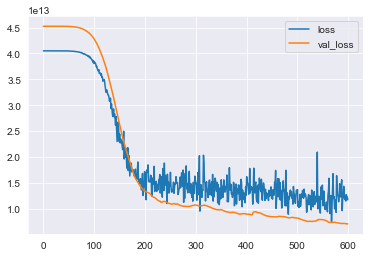

In [59]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [60]:
from sklearn.metrics import mean_squared_error, explained_variance_score

In [61]:
predictions = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,predictions))

2658373.4848562246

In [62]:
from sklearn.metrics import mean_absolute_error

In [63]:
mean_absolute_error(y_test,predictions)

1963014.7944078948

In [64]:
explained_variance_score(y_test,predictions)

0.7222852987336749

## Prophet Model

Since the neural network model did not do a great job at predicting the number of confirmed cases, let's try using Prophet. 

[Prophet](https://research.fb.com/blog/2017/02/prophet-forecasting-at-scale/) is a forecasting tool from Facebook that uses the data to predict future behavior. It is an additive regression model, a nonparametric model, ( these are contructed using info from the data rather than taking a predetermined form). One benefit is that additive regression models are more flexible than regular linear regression models. 

Through this model, Prophet has 4 main components:
- list of holidays (from user)
- weekly seasonal component with dummy variables
- yearly seasonal component with Fourier series
- piecewise linear/logistic curve trend (selects points in the data to detect changes in trends) 

To learn the basics of Prophet, click [here](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

In [65]:
from fbprophet import Prophet

In [66]:
conf_data = full[['Date', 'Confirmed']].groupby('Date', as_index = False).sum()
conf_data.columns = ['ds', 'y']
conf_data.ds = pd.to_datetime(conf_data.ds)

In [67]:
conf_data.head()

ds     y
0 2020-01-22   555
1 2020-01-23   654
2 2020-01-24   941
3 2020-01-25  1434
4 2020-01-26  2118

In [68]:
proph = Prophet()
proph.fit(conf_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
confirmed_pred = proph.make_future_dataframe(periods=60)
confirmed_pred.tail()

ds
243 2020-09-21
244 2020-09-22
245 2020-09-23
246 2020-09-24
247 2020-09-25

In [70]:
confirmed_forecast = proph.predict(confirmed_pred)
confirmed_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
243 2020-09-21  2.756564e+07  2.626625e+07  2.866654e+07
244 2020-09-22  2.775515e+07  2.644346e+07  2.887005e+07
245 2020-09-23  2.796512e+07  2.661425e+07  2.912478e+07
246 2020-09-24  2.817921e+07  2.681334e+07  2.935107e+07
247 2020-09-25  2.839455e+07  2.698432e+07  2.959518e+07

yhat is the forecast, and yhat_lower & yhat_upper are the uncertainty interval.

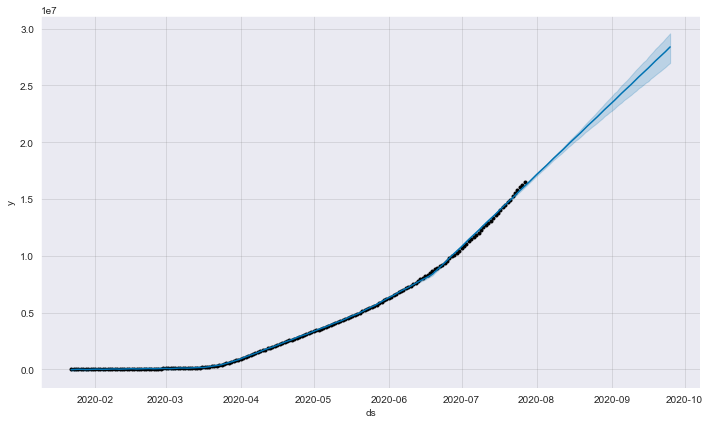

In [71]:
fig1 = proph.plot(confirmed_forecast)

The black dots represent the true y values while the blue line represents the forecast or predicted trend. From this graph, we can see that the Prophet model is doing a good job at predicting the number of confirmed cases as the data matches up with the predictions. 

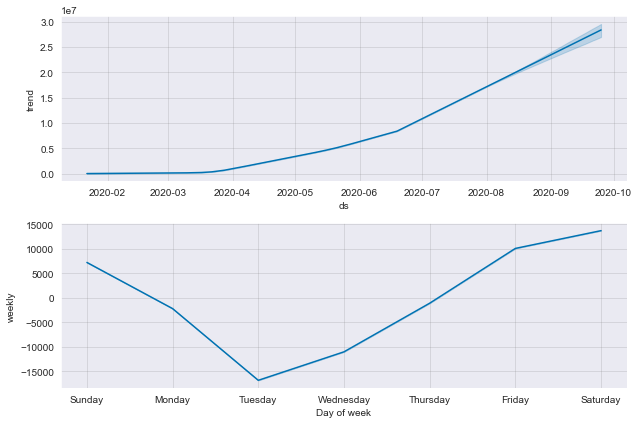

In [72]:
fig2 = proph.plot_components(confirmed_forecast)

This shows the yearly and weekly seasonilty of the cases trend. There is a steady increase in cases from February 2020 to October 2020. The weekly graph shows that Saturday tends to have the most cases with Tuesday having the least amount of cases.

# Model for Deaths

In [73]:
deaths_data = full[['Date', 'Deaths']].groupby('Date', as_index = False).sum()
deaths_data.columns = ['ds', 'y']
deaths_data.ds = pd.to_datetime(deaths_data.ds)

In [74]:
deaths_data.head()

ds   y
0 2020-01-22  17
1 2020-01-23  18
2 2020-01-24  26
3 2020-01-25  42
4 2020-01-26  56

In [75]:
proph2 = Prophet()
proph2.fit(deaths_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
deaths_pred = proph2.make_future_dataframe(periods=60)
deaths_pred.tail()

ds
243 2020-09-21
244 2020-09-22
245 2020-09-23
246 2020-09-24
247 2020-09-25

In [77]:
deaths_forecast = proph2.predict(deaths_pred)
deaths_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower    yhat_upper
243 2020-09-21  928776.925088  871700.040885  9.922365e+05
244 2020-09-22  933982.798883  874809.084468  9.990456e+05
245 2020-09-23  939549.453660  880287.512557  1.006933e+06
246 2020-09-24  945159.444018  882652.228753  1.014632e+06
247 2020-09-25  950675.516617  886262.940162  1.022704e+06

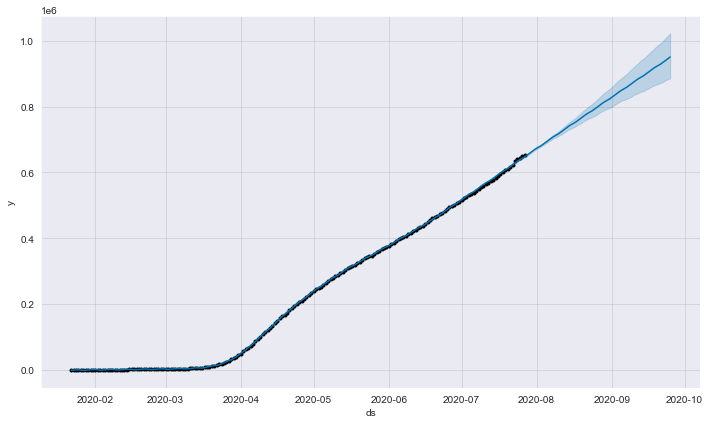

In [78]:
fig3 = proph2.plot(deaths_forecast)

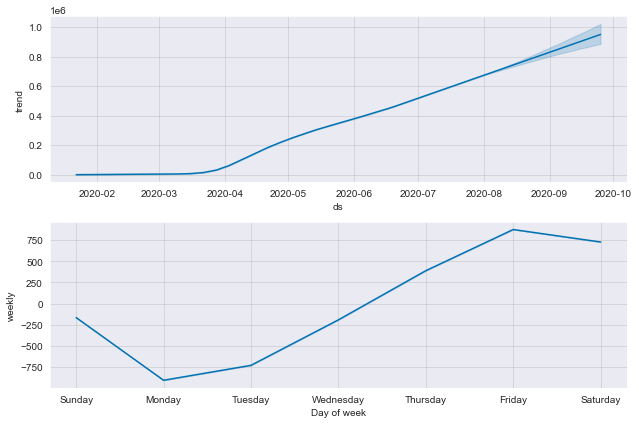

In [79]:
fig4 = proph2.plot_components(deaths_forecast)

The deaths were flattening at the beginning of 2020, but as time went on, the death cases began increasing. The most amount of deaths or on Saturday and the least amount of deaths is on Monday.

# Model for Recovered

In [80]:
rec_data = full[['Date', 'Recovered']].groupby('Date', as_index = False).sum()
rec_data.columns = ['ds', 'y']
rec_data.ds = pd.to_datetime(rec_data.ds)

In [81]:
rec_data.head()

ds   y
0 2020-01-22  28
1 2020-01-23  30
2 2020-01-24  36
3 2020-01-25  39
4 2020-01-26  52

In [82]:
proph3 = Prophet()
proph3.fit(rec_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
rec_pred = proph3.make_future_dataframe(periods=60)

In [84]:
rec_forecast = proph3.predict(deaths_pred)
rec_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
243 2020-09-21  1.684121e+07  1.599184e+07  1.767216e+07
244 2020-09-22  1.696856e+07  1.611298e+07  1.782159e+07
245 2020-09-23  1.711079e+07  1.624190e+07  1.796257e+07
246 2020-09-24  1.725357e+07  1.635571e+07  1.813263e+07
247 2020-09-25  1.739511e+07  1.648208e+07  1.830174e+07

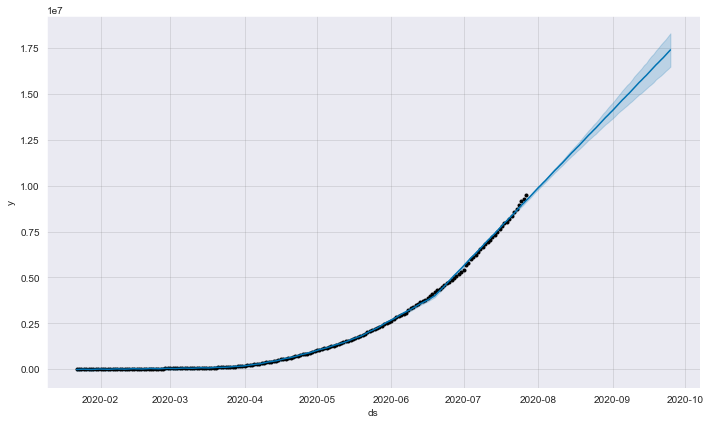

In [85]:
fig5 = proph3.plot(rec_forecast)

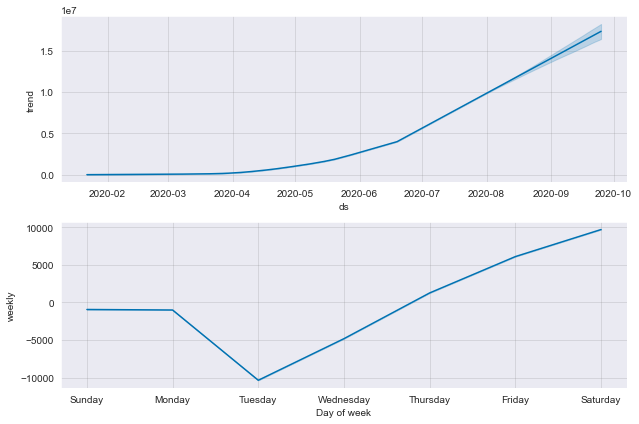

In [86]:
fig6 = proph3.plot_components(rec_forecast)

There is an increase in recovered cases. Saturday tends to have the most recovered cases while Tuesday has the least amount of recovered cases. 